In [13]:
import numpy as np
import soundfile as sf
from sklearn.model_selection import train_test_split
import glob
import os

# Load original data
data_path = 'C:/Users/Alireza/Desktop/BMI 532/Data/pure_training_data/'  # Replace with path to your original data directory
files = glob.glob(os.path.join(data_path, '*.wav'))
data = []
for file in files:
    x, fs = sf.read(file)  # Load audio file
    data.append(x)

# Load labels
labels_path = 'C:/Users/Alireza/Desktop/BMI 532/Data/murmurs.npy'  # Replace with path to your labels file
labels = np.load(labels_path)

# Split data and labels into train and test sets
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.4, random_state=42)

# Load synthetic data generated using train set
synthetic_path = 'C:/Users/Alireza/Desktop/BMI 532/Data/ChatGPT_data/'  # Replace with path to your synthetic data directory
synthetic_train = []
for i, file in enumerate(files):
    if labels[i] in labels_train:  # Check if synthetic data was generated using train set
        x, fs = sf.read(file)  # Load synthetic audio file
        synthetic_train.append(x)


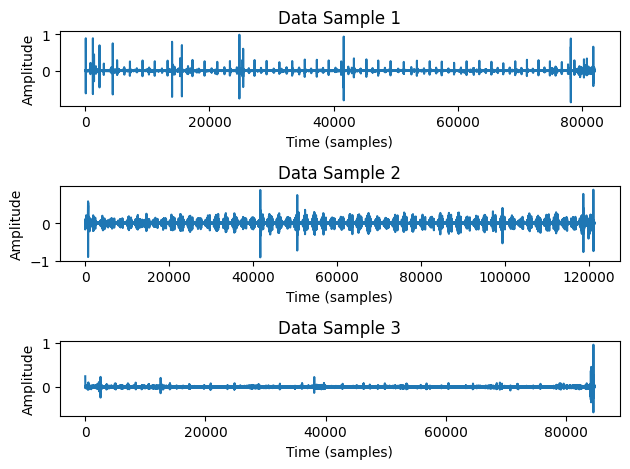

In [39]:
import matplotlib.pyplot as plt

# Choose three random data samples
indices = np.random.choice(len(data_train), 3, replace=False)

# Plot each data sample
for i, index in enumerate(indices):
    plt.subplot(3, 1, i+1)
    plt.plot(data_train[index])
    plt.title(f'Data Sample {i+1}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [23]:
import tensorflow as tf
from tensorflow.keras import layers

# Define CNN model architecture
model = tf.keras.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(None, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.GlobalMaxPooling1D(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])

# Define hyperparameters and compile the model
learning_rate = 0.001
batch_size = 32
epochs = 50
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Apply one-hot encoding to the labels for the synthetic data
labels_train_synthetic = tf.keras.utils.to_categorical(np.ones(len(synthetic_train)) * 2, num_classes=3)

# Preprocess and concatenate original and synthetic data
X_train = np.concatenate((data_train, synthetic_train), axis=0)
y_train = np.concatenate((labels_train, np.tile(labels_train_synthetic, (len(synthetic_train), 1))), axis=0)

# Add channel dimension to data for compatibility with CNN input shape
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(data_test, axis=-1)

# Convert NumPy arrays to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
labels_test = tf.convert_to_tensor(labels_test)

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
results = model.evaluate(X_test, labels_test)

# Print test set performance
print(f'Test loss: {results[0]:.4f}, Test accuracy: {results[1]:.4f}')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [38]:
from sklearn import svm
from sklearn.metrics import classification_report

# Apply one-hot encoding to the labels for the synthetic data
labels_train_synthetic = tf.keras.utils.to_categorical(np.ones(len(synthetic_train)) * 2, num_classes=3)

# Preprocess and concatenate original and synthetic data
X_train = np.concatenate((data_train, synthetic_train), axis=0)
y_train = np.concatenate((labels_train, np.tile(labels_train_synthetic, (len(synthetic_train), 1))), axis=0)

# Add channel dimension to data for compatibility with CNN input shape
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(data_test, axis=-1)

labels_int = np.argmax(y_train, axis=1)
labels_t_int = np.argmax(labels_test, axis=1)

# Convert the elements of X_train and X_test to float64
X_train_float = np.array([x.astype('float64') for x in X_train])
X_test_float = np.array([x.astype('float64') for x in X_test])

# Flatten the elements of X_train and X_test
X_train_flat = X_train_float.reshape(X_train_float.shape[0], -1)
X_test_flat = X_test_float.reshape(X_test_float.shape[0], -1)

# Train an SVM model
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train_flat, labels_int)

# Make predictions on the test set
y_pred = clf.predict(X_test_flat)

# Evaluate the model on the test set
print(classification_report(labels_t_int, y_pred))

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
c:\users\alireza\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\shape_base.py:591: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


ValueError: setting an array element with a sequence.

In [37]:
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype)
print("y_train shape:", labels_int.shape, "dtype:", labels_int.dtype)
print("X_test shape:", X_test.shape, "dtype:", X_test.dtype)
print("labels_test shape:", labels_t_int.shape, "dtype:", labels_t_int.shape)
print("X_train_flat shape:", X_train_flat.shape, "dtype:", X_train_flat.dtype)
print("X_test_flat shape:", X_test_flat.shape, "dtype:", X_train_flat.dtype)

X_train shape: (5060, 1) dtype: object
y_train shape: (10006466,) dtype: int64
X_test shape: (1266, 1) dtype: object
labels_test shape: (1266,) dtype: (1266,)
X_train_flat shape: (5060,) dtype: object
X_test_flat shape: (1266,) dtype: object
